Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [1]:
COLLABORATORS = "N/A"

---

In [2]:
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt
import warnings
%matplotlib inline


# HW 2:  Root Finding and Optimization

## Question 1 - Fun with Fixed Point iteration

Let's say that we wanted to calculate $\sqrt{M}$ given that $M \in \mathbb{R}$ and $M > 0$ and that we did not want to use the function `sqrt` directly.  Consider the function 

$$
    f(x) = x^2 - M
$$

which has a positive root at at $x=\sqrt{M}$.   Here we will try to solve this using  fixed point iteration

$$
    x_{k+1} = g(x_k)
$$
for several different iteration functions $g(x)$ (see below)

For each function $g$:

- Confirm analytically that $x=\sqrt{M}$ is a fixed point of $g(x)$
- Analyze the convergence behavior close to the fixed-point *for all values* of $\sqrt{M}$ and determine the stability of the iterative scheme
- Now set $M=3$  and $x_0 = 2$.  Make a nicely labeled convergence plot showing the log of the relative error as a function of iteration number.  If the solution converges: 
    * Describe the convergence rate (linear, quadratic, etc)
    * How many iterations are required to reduce the relative error to machine precision?


**Remember**: if you want to write $g^\prime$, remember to use `g^\prime` rather than `g'` in $\LaTeX$ (otherwise nbgrader gets very unhappy)

**(a)** [4] To help with the last part,  write a short python function to return N iterations of a fixed point iteration.

In [5]:
import numpy as np
def fixed_point(g, x0, N=5):
    """conduct N iterations of the fixed point iteration x_{k+1} = g(x_k)
    
    :Input:
        - *g* (function) - The iteration function
        - *x_0* (float) - Initial guess
        - *N* (int) - number of terms in iteration
     
    :Output:
        x: numpy array (float)
            array containing the iterations [ x0, x1, ... x_N ]
    """
    #x = np.array([0 for i in range(N+1)])
    #print(x)
    x = np.zeros(N+1)
    x[0] = x0
    #print(x)
    for i in range(N):
        x[i+1] = g(x[i])
        #print(i, x)
    return x

In [6]:
# Testing Cell

N = 5
g = lambda x: numpy.cos(x)
x0 = 1.
answer = numpy.array([1., 0.54030231, 0.85755322, 0.65428979, 0.79348036, 0.70136877])

x = fixed_point(g, x0, N )
numpy.testing.assert_allclose(x, answer)
print('success: passed N=5 test')

x_true = 0.7390851332153119
x = fixed_point(g, x0, 1000)
numpy.testing.assert_almost_equal(x[-1],x_true)
print('success: passed N=1000 test')

success: passed N=5 test
success: passed N=1000 test


**(b)** [6] analyze the problem with 
$$ g(x) = 1 + x - \frac{x^2}{M}$$

Analysis:

x* = g(x*) = 1 + x* - (x*)^2 / M
=> x* = M^(1/2)

g'(x*) = 1 - 2x* / M = 1 - 2/M^(1/2)
|g'(x*)| < 1 (converges) iff M > 1


For 𝑀=3  and  𝑥0=2, $x=\sqrt{3}$=1.732, the convergence behavior near the fixed point shows linear convergence, with relative error reaching machine epsilon within around 20 iterations.

Total number of iterations for relative error to reach machine epsilon was:  20
20 20


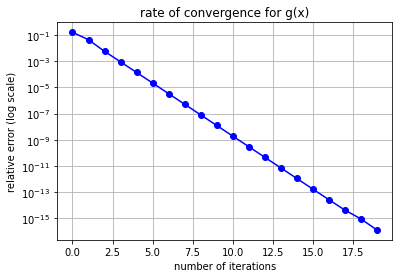

In [7]:
# Place plotting code here if needed

def plot_convergence(g, x0, MAX_NO_ITER=100):
    x = x0
    no_iters = [0]
    iters = 0
    r_arr = []
    eps = np.finfo(float).eps
    while iters < MAX_NO_ITER:
        r = abs(g(x)-x)/abs(x) # relative error
        r_arr.append(r)
        if r < eps: break
        x = g(x)
        iters += 1
        no_iters.append(iters)
    print("Total number of iterations for relative error to reach machine epsilon was: ", iters+1) # starting from 0
    
    print(len(no_iters), len(r_arr))
    if iters >= MAX_NO_ITER:
        no_iters = no_iters[:-1] # get rid of the last appended for cases where no convergence occurs
    plt.semilogy(no_iters, r_arr, 'bo-')
    # plt.semilogy([x], y, [fmt], data=None, **kwargs)
    plt.xlabel('number of iterations') 
    plt.ylabel('relative error (log scale)') 
    plt.title("rate of convergence for g(x)")
    plt.grid()
    
if __name__ == '__main__':
    M = 3
    x0 = 2
    g = lambda x: 1 + x - x**2/M
    
    plot_convergence(g, x0)
    
    #x = range(11)
    #y = fixed_point(g, x0, 10)
    #plt.plot(x,y)
    #plt.grid()

    #x_true = 1.73205080757
    #np.testing.assert_almost_equal(y[-1],x_true)

 **(c)** [6] analyze the problem with 
$$ g(x) = \frac{M}{x}$$


Analysis:
x* = g(x*) = M/x
=> x* = M^(1/2)
g'(x*) = -M / (x*)^2 = -1
|g'(x)| >= 1 thus diverges for all M.

For 𝑀=3  and  𝑥0=2, $x=\sqrt{3}$=1.732, the convergence behavior near the fixed point does not show convergence, as the relative error does not reach machine epsilon and rather oscillates back and forth.


Total number of iterations for relative error to reach machine epsilon was:  51
51 50


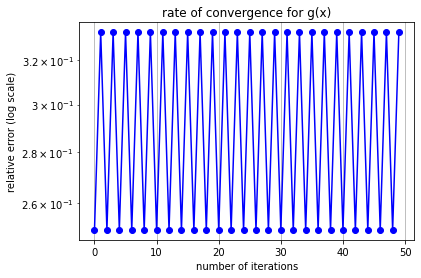

In [9]:
# Place plotting code here if needed
M = 3
x0 = 2
g = lambda x: M/x

plot_convergence(g, x0, 50)

**(d)** [6] Newton's method
$$ g(x) = x - \frac{f}{f^\prime}$$

with $$ f = x^2 - M$$

Analysis:

x* = g(x*) = x* - f(x*) / f'(x*)
=> x* = M^(1/2)
g"(x*) = M/(x*)^3 = 1/M^(1/2)
|g"(x*) / 2| < 1 (converges) iff M > 1/4


For 𝑀=3  and  𝑥0=2, $x=\sqrt{3}$=1.732, the convergence behavior near the fixed point shows quadratic convergence, with relative error reaching machine epsilon within around 5 iterations.

Total number of iterations for relative error to reach machine epsilon was:  5
5 5


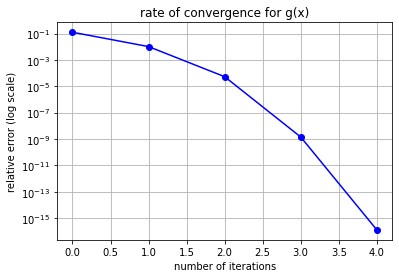

In [11]:
# Place plotting code here if needed

# f_prime = 2x
# g(x) = x - (x**2 - M) / 2x
M = 3
x0 = 2
g = lambda x: x - ((x**2 - 3) / (2*x) )

plot_convergence(g, x0)

## Question 2 - Fun with Rootfinders and NewtSafe

This problem will explore the behavior of a range of different rootfinding routines against  a more challenging rootfinding problem.  Feel free to use any or all  of the routines presented in class which have been included in an auxiliary python file `rootfinding_optimization_schemes.py`


You need to have this file in the same directory with your homework for this notebook to import it.

In [12]:
#  Cell to import and test at least newton's method from class

from  rootfinding_optimization_schemes import newton

# set test function and its derivative
f = lambda x: numpy.cos(x) - x
f_prime = lambda x: -numpy.sin(x) - 1.

#set initial guess and call newton
x0 = 1.
x, x_array = newton(f, f_prime, x0,tol=1.e-12)

# run tests
answer = 0.7390851332151606
N = 5
numpy.testing.assert_almost_equal(x, answer)
numpy.testing.assert_almost_equal(N, len(x_array))
print("functions loaded correctly")

functions loaded correctly


Consider the function 

$$
    f(x) = \cos(x) +  N(x, A, \alpha, \beta))
$$
where

$$
    N(x, A, \alpha, \beta) =  A\left[\sin(\alpha x) + \sin(\beta x)\right]
$$

is a function that adds smooth additive "noise" with fixed amplitude $A = 0.05$ and varying frequencies $\alpha$ and $\beta$

**(a)** [4] Make a nicely labeled plot to showing the behavior of this function for 
* $\alpha = 0.$, $\beta =0.$
* $\alpha = 4.$, $\beta =5.$
* $\alpha = 27$, $\beta = 50$

over the domain $x\in[-2\pi, 2\pi]$. Make sure you have enough points to resolve the wiggles.  You should plot all three curves on the same plot

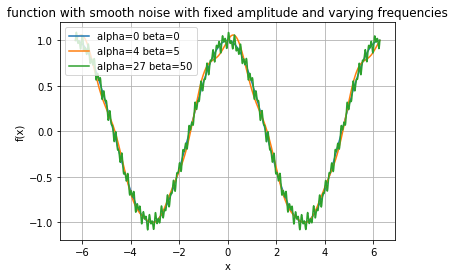

In [13]:
# same plot

x = np.linspace(-2*np.pi, 2*np.pi, 1000)
f1 = lambda x: np.cos(x) + 0.05 * (np.sin(0 * x) + np.sin(0 * x))
f2 = lambda x: np.cos(x) + 0.05 * (np.sin(4 * x) + np.sin(5 * x))
f3 = lambda x: np.cos(x) + 0.05 * (np.sin(27 * x) + np.sin(50 * x))

plt.plot(x, f1(x), label='alpha=0 beta=0')
plt.plot(x, f2(x), label='alpha=4 beta=5')
plt.plot(x, f3(x), label='alpha=27 beta=50')
plt.xlabel('x') 
plt.ylabel('f(x)') 
plt.title("function with smooth noise with fixed amplitude and varying frequencies")
plt.grid()
plt.legend()

**(b)** [4] Explore the behavior of the following rootfinding routines 
* bisection
* newton
* secant
* brentq method using scipy.optimize.root_scalar
* **EXTRA CREDIT** any other method used in root_scalar

for finding a root of this function, given the bracket $x\in[x_0, x_1]$ with $x_0 = 0.2$, $x_1 = 2.$ for each ($\alpha, \beta$) pair

`params = [ (0., 0.), (4., 5.),  (27, 50.) ]`

For each routine,  report
* the root found $x^*$
* the value of $f$ at the root $f(x^*$)
* the number of iterations.

In [15]:
from rootfinding_optimization_schemes import *
from scipy.optimize import root_scalar

import sympy
#x, y, z = symbols('x y z')
#init_printing(use_unicode=True)
x = sympy.symbols('x') 

params = [ (0., 0.), (4., 5.),  (27, 50.) ]
x0 = 0.2
x1 = 2.

for i in range(len(params)):
    alpha = params[i][0]
    beta = params[i][1]
    g = lambda x: sympy.cos(x) + 0.05 * (sympy.sin(alpha * x) + sympy.sin(beta * x))
    f = sympy.cos(x) + 0.05 * (sympy.sin(alpha * x) + sympy.sin(beta * x))
    f_prime = f.diff(x)
    f = sympy.lambdify(x,f)
    f_prime = sympy.lambdify(x,f_prime)

    print("alpha is: ", alpha, "beta is: ", beta)
    
    final_midpoint1, bracket_centers1 = bisection(f, x0, x1)
    print("\nBisection routine: the root found at x* is: ", final_midpoint1, " the value of f at the root is ", f(final_midpoint1), " and the number of iterations is: ", len(bracket_centers1))
    
    final_midpoint2, bracket_centers2 = newton(f, f_prime, x0)
    print("\nNewton's Method routine: the root found at x* is: ", final_midpoint2, " the value of f at the root is ", f(final_midpoint2), " and the number of iterations is: ", len(bracket_centers2))
    
    
    final_midpoint3, bracket_centers3 = secant(f, x0, x1)
    print("\nSecant routine: the root found at x* is: ", final_midpoint3, " the value of f at the root is ", f(final_midpoint3), " and the number of iterations is: ", len(bracket_centers3))
    
    
    sol = root_scalar(f, bracket=(x0, x1),method='brentq')
    print("\nBrentq routine: the root found at x* is: ", sol.root, " the value of f at the root is ", f(sol.root), " and the number of iterations is: ", sol.iterations)

    print("\n-----------------------------\n")
    

alpha is:  0.0 beta is:  0.0

Bisection routine: the root found at x* is:  1.570796775817871  the value of f at the root is  -4.490229742968679e-07  and the number of iterations is:  20

Newton's Method routine: the root found at x* is:  4.71238898038469  the value of f at the root is  -1.8369701987210297e-16  and the number of iterations is:  5

Secant routine: the root found at x* is:  1.5707963267998242  the value of f at the root is  -4.927552640156338e-12  and the number of iterations is:  6

Brentq routine: the root found at x* is:  1.5707963267948966  the value of f at the root is  6.123233995736766e-17  and the number of iterations is:  7

-----------------------------

alpha is:  4.0 beta is:  5.0

Bisection routine: the root found at x* is:  1.6304405212402344  the value of f at the root is  1.9620940003295395e-07  and the number of iterations is:  18

Newton's Method routine: the root found at x* is:  -14.096326236971352  the value of f at the root is  6.931560738582254e-08 

**(c)** [4] Make a convergence plot showing the relative error at each step for Newton's method for the same three parameter pairs and initial guess $x_0 = 0.2$.  Hint: your convergence plots should use `semilogy` for clearest results.  Again put all your results on one plot and label things well

0.0 0.0
4.0 5.0
27 50.0


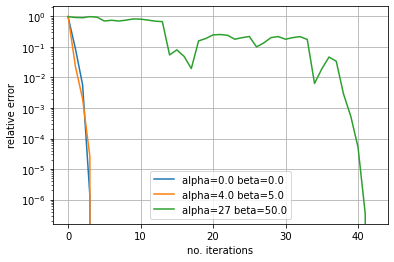

In [65]:
def rel_errors(x_final, x_arr):
    r = np.array(np.abs((x_final-x_arr)/x_final)) # relative error
    return r

if __name__ == '__main__':
    x0 = 0.2
    x = sympy.symbols('x') 
    params = [ (0., 0.), (4., 5.),  (27, 50.) ]
    for i in range(len(params)):
        alpha = params[i][0]
        beta = params[i][1]
        print(alpha, beta)
        g = lambda x: sympy.cos(x) + 0.05 * (sympy.sin(alpha * x) + sympy.sin(beta * x))
        f = sympy.cos(x) + 0.05 * (sympy.sin(alpha * x) + sympy.sin(beta * x))
        
        f_prime = f.diff(x)
        f = sympy.lambdify(x,f)
        f_prime = sympy.lambdify(x,f_prime)

        x_final, x_arr = newton(f, f_prime, x0)
        rel = rel_errors(x_final, x_arr)
        no_iters = [i for i in range(len(x_arr))]
        plt.semilogy(no_iters, rel, label=f'alpha={alpha} beta={beta}')
    plt.plot()
    plt.xlabel('no. iterations') 
    plt.ylabel('relative error') 
    plt.legend()
    plt.grid()

**(d)** [4] Briefly explain your results so far for all the methods.  Feel free to play with other initial parameters or to make additional plots.  

At (27,50) the results take much longer to converge, whereas at (0,0) and (4,5) the results are able to converge faster.

**(e)** [6] Write a controlled Newton routine `NewtSafe`,  that finds a root with an initial bracket by combining newton steps with a bisection routine.  The basic algorithm is to first try Newton from the midpoint of the bracket.  If Newton predicts a solution outside of the bracket, ignore it and take a bisection step instead.  You can use and modify any of the rootfinding routines I presented in class, but write a decent docstring and raise appropriate exceptions as necessary. 

The routine should return the best estimate of the root and number of Newton Steps and the number of bisection steps

`x, N_newt, N_bisection = newtsafe(f, f_prime, a, b)`

In [49]:
def newtsafe(f,f_prime,a,b,tol = 1.e-6, max_steps=1000):
    """ Please improve this docstring
        
    
    Parameters:
    -----------
    
    f: function (float)
        function returning f(x)
    f_prime:  function (float)
        function returning derivative of f with respect to x
    a: float
        left bracket a < x
    b: float
        right bracket x < b
        
        Note:  the signs of f(a) and f(b) must be different to insure a bracket
    tol: float
        tolerance.  Returns when |f(x)| < tol
    max_steps: int
        maximum number of iteration steps
        
    Returns:
    --------
    x: float
        midpoint of final bracket
    n_newt:  number of newton steps for successful newton iteration
    n_bisection: number of bisection steps
        
    Raises:
    -------
    ValueError:  
        if initial bracket is invalid 
    Warning: 
        if number of iterations exceed MAX_STEPS
    Prints warning if Newton exceeds the bracket
    
    """
    n_newt = n_bisection = 0    

    x = (a + b) / 2.0 # take the midpoint as the starting point
    x_array = [ x ]
    
    if np.sign(f(a)) == np.sign(f(b)):
        raise ValueError("f(a) and f(b) must have different signs")
    
    for newton_step in range(1, max_steps+1):
        if np.abs(f(x)) < tol:
            break
        x_new = x - f(x) / f_prime(x)
            
        if x_new < a or x_new > b:
            n_bisection += 1
            if np.sign(f(a)) != np.sign(f(x)):
                b = x
            else:
                a = x
            delta_x = b - a
            x_new = a + delta_x / 2.0
        else:
            n_newt += 1

        x = x_new
        x_array.append(x)

    
    return x, n_newt, n_bisection
        
    
    
# YOUR CODE HERE
# for loop, each run is a step
# range(0, max_steps + 1)
# start at the middle of the bracket, that's the x0
# if the guess is outside of the bounds then reject, instead copy bisection method
# call newton at beginning of bracket, if outside, reject, if guesses 



In [50]:
# you can play with your code here

In [51]:
# Testing Cell
from  rootfinding_optimization_schemes import newton
from scipy.optimize import root_scalar

a = 27
b = 50
A = 0.3
f = lambda x: numpy.cos(x) + A*(numpy.sin(a * x) + numpy.sin(b * x))
f_prime = lambda x: -numpy.sin(x) + A*(a*numpy.cos(a * x) + b*numpy.cos(b * x))

pi = numpy.pi

brackets = [ 
            (-0.68309670780092, 2.642524050776319),
            (-0.7104536143852529, 3.8152626763086603),
            (-0.5236057894835726, 3.9067882124238986),
            (-0.5275356434135271, 2.4988039593212776),
            (-0.3534683303763972, 3.9130408021252014)
           ]

for bracket in brackets:
    #a = numpy.random.uniform(low=-pi/4, high=pi/4)
    #b = numpy.random.uniform(low=3*pi/4, high=5*pi/4)
    a = bracket[0]
    b = bracket[1]
    x_n, x_array = newton(f, f_prime, (a + b)/2.)
    x_ns, N_n, N_b = newtsafe(f, f_prime, a, b)
    sol = root_scalar(f, bracket=(a, b),method='brentq')
    print('Bracket  = [{}, {}]'.format(a, b))
    print('Newton   = {},    N   = {}'.format(x_n, len(x_array)-1))
    print('NewtSafe = {},    N_n = {}, N_b = {}'.format(x_ns, N_n, N_b))
    print('brentq   = {},    N   = {}'.format(sol.root, sol.iterations))
    print()
    numpy.testing.assert_almost_equal(x_ns, sol.root,decimal=5)
    
try:
    x_ns, N_n, N_b = newtsafe(f, f_prime, 1.6, 2.0)
except ValueError as err:
    print(err)
    pass

print('success!')


Bracket  = [-0.68309670780092, 2.642524050776319]
Newton   = 1.27194847295657,    N   = 3
NewtSafe = 1.27194847295657,    N_n = 3, N_b = 0
brentq   = 1.2719484732512498,    N   = 9

Bracket  = [-0.7104536143852529, 3.8152626763086603]
Newton   = -23.8662065317763,    N   = 7
NewtSafe = 1.0884990113244402,    N_n = 3, N_b = 2
brentq   = 1.088499013515958,    N   = 13

Bracket  = [-0.5236057894835726, 3.9067882124238986]
Newton   = -10.863477689404652,    N   = 11
NewtSafe = 1.1106142646362411,    N_n = 5, N_b = 1
brentq   = 1.1106142646873127,    N   = 11

Bracket  = [-0.5275356434135271, 2.4988039593212776]
Newton   = 1.3248590962279085,    N   = 3
NewtSafe = 1.3248590962279085,    N_n = 3, N_b = 0
brentq   = 1.3248590968150393,    N   = 9

Bracket  = [-0.3534683303763972, 3.9130408021252014]
Newton   = 1.1473182519095415,    N   = 10
NewtSafe = 1.1473181573836526,    N_n = 6, N_b = 1
brentq   = 1.1473182519138232,    N   = 9

f(a) and f(b) must have different signs
success!


## Question 3 - Solve a "real" rootfinding problem

In Homework 2, I asked you to *estimate* the number of terms in the taylor expansion of $e^x$ such that the relative error was less than $\epsilon_{mach}$.  This was essentially a non-linear problem in the number of steps $n$.  Here we will use a rootfinder to get this number more precisely.

**(a)** [8] provide a numerical solution for the number of terms $n$ in the Taylor polynomial expansion of exp(x) (i.e. $T_N(x))$ such that the relative error is

$$
    r = \left| \frac{x^{n+1}}{(n + 1)!} \right| \approx \epsilon_{mach}
$$ 

Give solutions for x = 0.1, 1., 10. ,100. , 709., 1000. and compare your numerical solution to the approximate solution given in last homework 

$$
    n > e*x
$$

by calculating the relative error between the your numerical solution and your simpler estimate.

Note: To make this problem easier, just use Stirling’s approximation $\log(n!) \approx n \log n − n$. which will work quite well.  However, for a little bit of extra credit solve this for the full problem and compare solutions.


YOUR ANSWER HERE

In [63]:
# from hw1:

def Tn_exp(x):

    assert(isinstance(x,float))
    
    x_neg = x < 0
    x = abs(x) 
    
    eps = numpy.finfo(float).eps
    tolerance = 8 * eps
    
    MAX_N = 120
    p = [1/factorial(n) for n in range(MAX_N)][::-1]
    
    y = p[0]
    for coefficient in p[1:]: 
        y = y * x + coefficient
    
    Tn = y
    if x_neg:
        Tn = 1/Tn
    
    return Tn, MAX_N


# assume x is positive and that n is large

from scipy.optimize import root_scalar

eps = np.finfo(float).eps
x_vals = [0.1, 1., 10., 100., 709., 1000.]

for i in range(len(x_vals) - 1):
    a = x_vals[i] * np.exp(1)
    b = x_vals[i+1] * np.exp(1) * 10
    f = lambda n: (n+1)*np.log(x_vals[i]) - (n+1)*np.log(n+1) + (n+1) - np.log(eps)
    n_estimate = np.exp(1)*x_vals[i]
    print(a, b)
    sol = root_scalar(f, bracket=(a, b),method='brentq')
    r = abs(sol.root-n_estimate)/abs(sol.root)
    print("relative error is: ", sol.root, " simpler estimate is ", n_estimate)
    

0.27182818284590454 27.18281828459045
relative error is:  8.99825226361313  simpler estimate is  0.27182818284590454
2.718281828459045 271.8281828459045
relative error is:  17.69326017986983  simpler estimate is  2.718281828459045
27.18281828459045 2718.281828459045
relative error is:  52.39200282157356  simpler estimate is  27.18281828459045
271.8281828459045 19272.61816377463
relative error is:  304.82890183560164  simpler estimate is  271.8281828459045
1927.261816377463 27182.818284590452
relative error is:  1961.9765738907563  simpler estimate is  1927.261816377463
